RBF NN

In the field of mathematical modeling, a radial basis function network is an artificial neural network that uses radial basis functions as activation functions. The output of the network is a linear combination of radial basis functions of the inputs and neuron parameters. Radial basis function networks have many uses, including function approximation, time series prediction, classification, and system control.

Radial basis function (RBF) networks typically have three layers: an input layer, a hidden layer with a non-linear RBF activation function and a linear output layer.
The input can be modeled as a vector of real numbers
Radial basis function (RBF) networks typically have three layers: an input layer, a hidden layer with a non-linear RBF activation function and a linear output layer.

Functions that depend only on the distance from a center vector are radially symmetric about that vector, hence the name radial basis function. In the basic form, all inputs are connected to each hidden neuron. The norm is typically taken to be the Euclidean distance (although the Mahalanobis distance appears to perform better with pattern recognition) and the radial basis function is commonly taken to be Gaussian.

Given certain mild conditions on the shape of the activation function, RBF networks are universal approximators on a compact subset of
Given certain mild conditions on the shape of the activation function, RBF networks are universal approximators on a compact subset of R^n

This means that an RBF network with enough hidden neurons can approximate any continuous function on a closed, bounded set with arbitrary precision.

The parameters
a_i,
c_i, and
beta_i are determined in a manner that optimizes the fit between
phi and the data.

Rbf-network.svg

By Leitisvatn - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=124560257

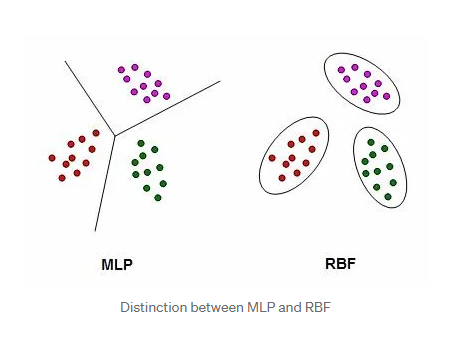

In [4]:
import tensorflow as tf
from tensorflow import keras
from RBF_neuralNetwork_updated import RBFLayer,InitCentersRandom,InitCentersKMeans

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.optimizers import RMSprop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [6]:
data = pd.read_csv("/content/bilkav.com_Churn_Modelling.csv")
X = data.iloc[:, 3:13]
Y = data.iloc[:, 13]
X = pd.get_dummies(X)
X.drop("Gender_Female", axis=1, inplace=True)
X.rename(columns = {"Gender_Male": "Gender"}, inplace=True) # male = 1 , female = 0

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.20, random_state= 42)
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

from sklearn.preprocessing import MinMaxScaler
mm_train = MinMaxScaler()
X_train = mm_train.fit_transform(x_train)
mm_test = MinMaxScaler()
X_test = mm_test.fit_transform(x_test)

In [ ]:
model = Sequential()
rbflayer = RBFLayer(12,
                        initializer=InitCentersRandom(X_train),
                        betas=3.0,
                        input_shape=(12,))

model.add(rbflayer)
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(), metrics=['accuracy'])
print(model.summary())
history1 = model.fit(X_train, y_train, epochs=100, batch_size=32)

y_pred = model.predict(X_test)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rbf_layer_31 (RBFLayer)     (None, 12)                156       
                                                                 
 dense_6 (Dense)             (None, 1)                 13        
                                                                 
 activation_6 (Activation)   (None, 1)                 0         
                                                                 
Total params: 169 (676.00 Byte)
Trainable params: 169 (676.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5938 - accuracy: 0.7924
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5027 - accuracy: 0.7944
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - los

In [ ]:
model = Sequential()
rbflayer = RBFLayer(12,
                        initializer=InitCentersKMeans(X_train),
                        betas=3.0,
                        input_shape=(12,))

model.add(rbflayer)
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(), metrics=['accuracy'])
print(model.summary())
history1 = model.fit(X_train, y_train, epochs=100, batch_size=32)

y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rbf_layer_30 (RBFLayer)     (None, 12)                156       
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
 activation_5 (Activation)   (None, 1)                 0         
                                                                 
Total params: 169 (676.00 Byte)
Trainable params: 169 (676.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6991 - accuracy: 0.7945
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5190 - accuracy: 0.7946
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - los

In [ ]:
y_test

0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    0
1997    1
1998    1
1999    1
Name: Exited, Length: 2000, dtype: int64

In [ ]:
results = model.evaluate(X_test, y_test, batch_size=32)
print("test loss:", results[0])
print("test accuracy:",results[1]*100,'%')

pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Test Accuracy is:', a*100)

63/63 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.8300
test loss: 0.4113898277282715
test accuracy: 82.99999833106995 %
Test Accuracy is: 100.0


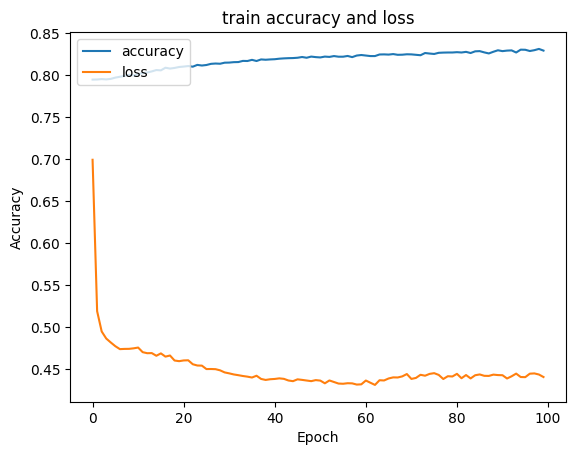

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('train accuracy and loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [ ]:
y_pred

array([[ 0.09785646],
       [ 0.06323075],
       [ 0.24745263],
       ...,
       [ 0.6017957 ],
       [-0.08664554],
       [ 0.22281836]], dtype=float32)

In [ ]:
y_pred = (y_pred > 0.5)
conf_matrix = confusion_matrix(y_pred, y_test)

print(conf_matrix)
print(classification_report(y_pred, y_test))

[[1566  303]
 [  41   90]]
              precision    recall  f1-score   support

       False       0.97      0.84      0.90      1869
        True       0.23      0.69      0.34       131

    accuracy                           0.83      2000
   macro avg       0.60      0.76      0.62      2000
weighted avg       0.93      0.83      0.86      2000



In [10]:
model = Sequential()
rbflayer = RBFLayer(12,
                        initializer=InitCentersKMeans(X_train),
                        betas=3.0,
                        input_shape=(12,))

model.add(rbflayer)
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(), metrics=['accuracy'])
print(model.summary())
history1 = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data= [X_test, y_test])

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rbf_layer_1 (RBFLayer)      (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 169 (676.00 Byte)
Trainable params: 169 (676.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.8177 - accuracy: 0.7945 - val_loss: 0.4955 - val_accuracy: 0.8035
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.7949 - val_loss: 0.4718 - val_accura

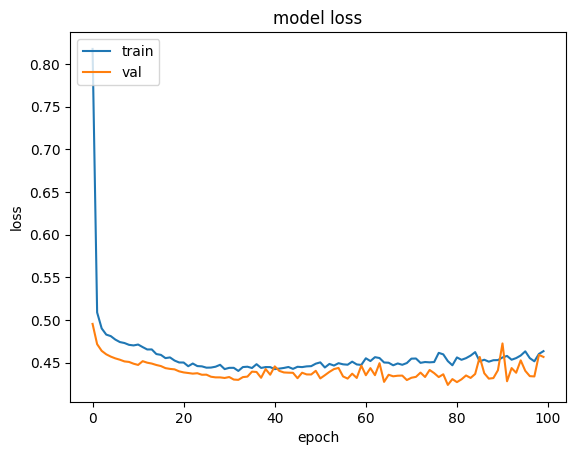

In [11]:
from matplotlib import pyplot as plt
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()